In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
from ripser import ripser
from persim import plot_diagrams

def topological_entropy(x_values, y_values):
    # create a list of points
    points = np.column_stack((x_values, y_values))

    # calculate the persistence diagram of the data
    dgms = ripser(points)['dgms']
    # check if the persistence diagram is empty
    if len(dgms[1]) == 0:
        topo_entropy = 0
    else:
      # calculate the topological entropy as the sum of the lifetimes of the features
      topo_entropy = sum([d[1]-d[0] for d in dgms[1]])

    return topo_entropy

In [3]:
from transformers import  AlbertModel

model_name = f"albert-xxlarge-v2"
albert = AlbertModel.from_pretrained(model_name)


Some weights of the model checkpoint at albert-xxlarge-v2 were not used when initializing AlbertModel: ['predictions.bias', 'predictions.decoder.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.bias', 'predictions.dense.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
import weightwatcher as ww
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(ww.__name__) 
logger.setLevel(logging.INFO)


In [6]:
watcher = ww.WeightWatcher(model=albert)
details = watcher.describe()
details

INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.22.3
torch version 1.12.1
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels':



python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.22.3
torch version 1.12.1


,layer_id,name,M,N,Q,layer_type,longname,num_evals,rf
0,2,Embedding,128.0,30000.0,234.375,LAYER_TYPE.EMBEDDING,embeddings.word_embeddings,128.0,1.0
0,3,Embedding,128.0,512.0,4.000,LAYER_TYPE.EMBEDDING,embeddings.position_embeddings,128.0,1.0
0,4,Embedding,2.0,128.0,64.000,LAYER_TYPE.EMBEDDING,embeddings.token_type_embeddings,2.0,1.0
0,8,Linear,128.0,4096.0,32.000,LAYER_TYPE.DENSE,encoder.embedding_hidden_mapping_in,128.0,1.0
0,15,Linear,4096.0,4096.0,1.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0....,4096.0,1.0
0,16,Linear,4096.0,4096.0,1.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0....,4096.0,1.0
0,17,Linear,4096.0,4096.0,1.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0....,4096.0,1.0
0,20,Linear,4096.0,4096.0,1.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0....,4096.0,1.0
0,22,Linear,4096.0,16384.0,4.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0.ffn,4096.0,1.0
0,23,Linear,4096.0,16384.0,4.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0....,4096.0,1.0


INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'f

Calculating best minimal value for power law fit


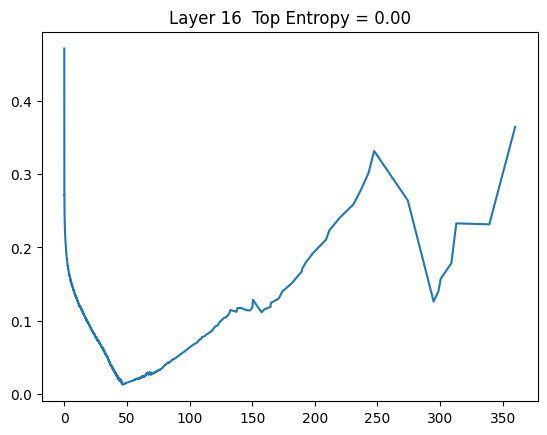

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'f

Calculating best minimal value for power law fit


In [ ]:
import powerlaw

for layer_id in [16,17,23,26]:
    esd = watcher.get_ESD(layer=layer_id)
    fit = powerlaw.Fit(esd)
    x, y = fit.xmins, fit.Ds
    top_entropy = topological_entropy(x,y)
    plt.plot(x,y)
    plt.title(f"Layer {layer_id}  Top Entropy = {top_entropy:0.2f}")
    plt.show()